In [1]:
# Ensure src/ is in sys.path so 'tools' can be imported
# %%
import sys, os
try:
    # ✅ Running from a Python script (.py file)
    TOOLS_PATH = os.path.abspath(os.path.join(os.path.dirname(__file__), ".."))
except NameError:
    # ✅ Running from a Jupyter notebook (__file__ is not defined)
    TOOLS_PATH = os.path.abspath(os.path.join(os.getcwd(), ".."))
SRC_PATH = os.path.join(TOOLS_PATH)


if SRC_PATH not in sys.path:
    sys.path.insert(0, SRC_PATH)
    print(f"✅ SRC path added: {SRC_PATH}")
else:
    print(f"🔁 SRC path already in sys.path: {SRC_PATH}")

✅ SRC path added: /home/prashant-agrawal/projects/netflix_talk2data/src


In [ ]:
# src/graph/build_graph.py

from langgraph.graph import StateGraph, START
from agents.supervisor_agent import supervisor_node
from agents.enhancer_agent import enhancer_node
from agents.qdrant_search_agent import quadrant_search_node
from schema.agent_state import AgentState

def build_graph():
    """
    Constructs and compiles the LangGraph workflow:

      START
        ↓
    supervisor_node
        ├──> enhancer_node ───┐
        │       ↑             │
        │       └─────────────┘
        └──> quadrant_search_node -> END

    Returns:
        A compiled graph ready to invoke or stream.
    """
    builder = StateGraph(state_schema=AgentState)

    # Register each node
    builder.add_node("supervisor", supervisor_node)
    builder.add_node("enhancer", enhancer_node)
    builder.add_node("qdrant_search", quadrant_search_node)

    # Define where execution begins
    builder.set_entry_point("supervisor")

    # Static edges for validation (dynamic goto inside supervisor handles actual flow)
    builder.add_edge(START, "supervisor")
    builder.add_edge("supervisor", "enhancer")
    builder.add_edge("enhancer", "supervisor")
    #builder.add_edge("supervisor", "qdrant_search")

    # Mark the end node
    builder.set_finish_point("qdrant_search")

    # Compile into an executable graph
    return builder.compile()

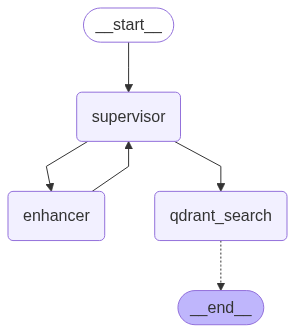

In [13]:
# ...existing code...
  # or from src.graph.build_graph import build_graph, depending on your sys.path

graph = build_graph()

# 2. Generate a Mermaid‐style PNG
#    xray=True gives you the full node labels and edges
mermaid_png = graph.get_graph(xray=True).draw_mermaid_png()

# 3. Display it in‐notebook
from IPython.display import Image, display
display(Image(mermaid_png))
# ...existing code...